# Projet Apprentissage Supervisé


<b>Réaslié par :</b>
<li>FHIYIL Soufiane</li>
<li>MOUHDA Mohammed Reda</li>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, KFold

%matplotlib inline

In [2]:
data = pd.read_csv('../creditcard.csv')

In [3]:
data.shape

(284807, 31)

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Exploratory data analysis

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


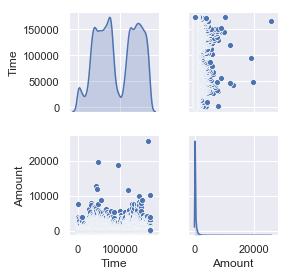

In [28]:
sns.set()
columns = ['Time','Amount']
sns.pairplot(data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

### plot data on the first principal components

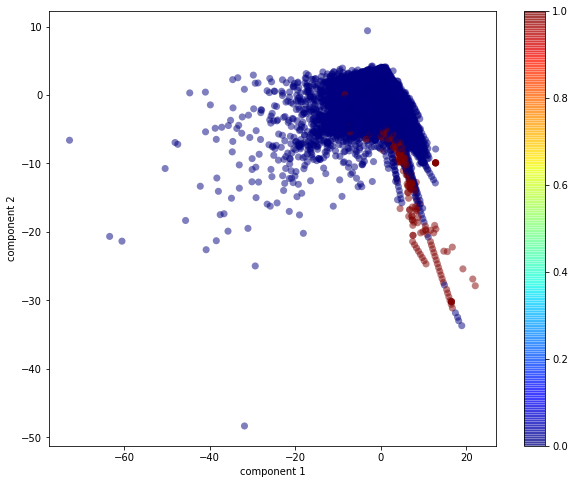

In [180]:
from numpy.random import rand

plt.figure(figsize=(10,8))

plt.scatter(data.iloc[:, 2], data.iloc[:,3],
            c=data.Class, edgecolor='none', alpha=0.5, s=50, cmap=plt.cm.get_cmap('jet'))


plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### boxplot

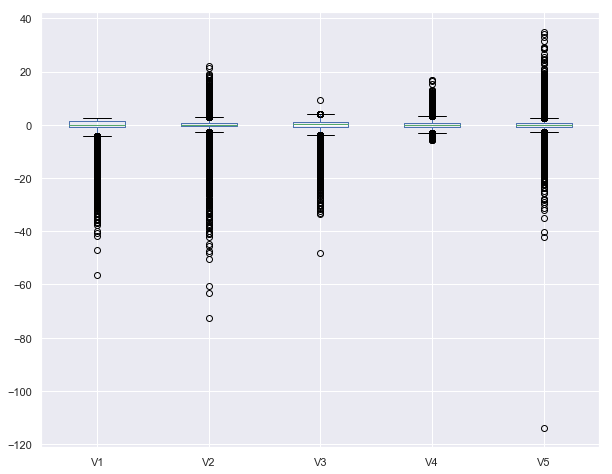

In [60]:
plt.figure(figsize=(10,8))
data.boxplot(column=['V1', 'V2', 'V3', 'V4', 'V5'])

## Resampling (under-sampling & over-sampling)

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

<img src="image.png" />

The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

<b style="color:red">---> to avoid this loss of information or overfitting, we'll use both methods and combine them in order ta balance our data</b>

### Combine both methods (under-sampling & over-sampling)

#### Split the data (Training data 70% & Test data 30%)

In [5]:
from sklearn.model_selection import train_test_split

# Split our data
x_train, x_test, y_train, y_test = train_test_split(data.ix[:,1:29],
                                                          data['Class'],
                                                          test_size=0.30,
                                                          random_state=0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [6]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((199364, 28), (85443, 28), (199364,), (85443,))

<b>---> we'll use combining method on training sample<b>

In [7]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=0)

In [8]:
import collections

X_resampled, y_resampled = smote_enn.fit_resample(x_train, y_train)

In [9]:
print(sorted(collections.Counter(y_resampled).items()))

[(0, 198705), (1, 199019)]


In [11]:
X_resampled.shape, y_resampled.shape

((397724, 28), (397724,))

---
## Bayesien Naïf

In [7]:
# View class distributions
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [123]:
from sklearn.naive_bayes import GaussianNB

# Initialize our classifier
bayes = GaussianNB()

In [132]:
# Train our classifier
model_bayes = bayes.fit(X_resampled, y_resampled)

In [133]:
# Predict test data
y_pred = model_bayes.predict(x_test)

#### Accuracy

In [134]:
from sklearn.metrics import accuracy_score,log_loss

In [135]:
accuracy_score(y_test,y_pred)

0.9751998408295589

<b>---> On ne peut pas utiliser l'accuracy comme une métrique de performance, car les classes sont déséquilibres, on aura toujours une accuracy qui est très élevé et c'est à cause de la classe 0 qui représente 90% des données </b>

In [136]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.86      0.11       147

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.98      0.99     85443



#### ROC AUC

In [138]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.9196685778982386

#### Cross Validation for Bayes

In [139]:
from sklearn.model_selection import cross_val_score, KFold

#init
scores = cross_val_score(bayes, X_resampled, y_resampled, cv=5, scoring='roc_auc')

In [140]:
scores

array([0.95197932, 0.95017419, 0.95156574, 0.95081222, 0.95079121])

## LDA

In [181]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_resampled, y_resampled)

#predict test data
y_pred = lda.predict(x_test)

#### Cross-validation for LDA

In [182]:
cross_val_score(lda, X_resampled, y_resampled, cv=5, scoring='roc_auc')

array([0.97818286, 0.97929308, 0.97946947, 0.97951514, 0.97900331])

In [183]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== AUC ===")
print(roc_auc_score(y_test,y_pred))

=== Confusion Matrix ===
[[84359   937]
 [   27   120]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85296
           1       0.11      0.82      0.20       147

   micro avg       0.99      0.99      0.99     85443
   macro avg       0.56      0.90      0.60     85443
weighted avg       1.00      0.99      0.99     85443



=== AUC ===
0.9026706279022583


## Quadratic Discriminant Analysis

In [187]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#init
qda = QuadraticDiscriminantAnalysis()

#fit the data
qda.fit(X_resampled, y_resampled)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [188]:
y_pred = qda.predict(x_test)

#### Cross-validation for Quadratic Discriminant Analysis

In [189]:
cross_val_score(qda, X_resampled, y_resampled, cv=5, scoring='roc_auc')

array([0.98278651, 0.98250811, 0.98270143, 0.9828983 , 0.98258829])

In [190]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== AUC ===")
print(roc_auc_score(y_test,y_pred))

=== Confusion Matrix ===
[[83035  2261]
 [   20   127]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85296
           1       0.05      0.86      0.10       147

   micro avg       0.97      0.97      0.97     85443
   macro avg       0.53      0.92      0.54     85443
weighted avg       1.00      0.97      0.98     85443



=== AUC ===
0.9187189436832695


## Linear SVM

In [11]:
from sklearn import svm

#init
svm = svm.SVC(gamma='scale')

#fit the data
svm.fit(X_resampled, y_resampled)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
y_pred = svm.predict(x_test)

In [15]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== AUC ===")
print(roc_auc_score(y_test,y_pred))

=== Confusion Matrix ===
[[84682   614]
 [   27   120]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.16      0.82      0.27       147

   micro avg       0.99      0.99      0.99     85443
   macro avg       0.58      0.90      0.63     85443
weighted avg       1.00      0.99      0.99     85443



=== AUC ===
0.9045640343925978


#### cross-validation

In [18]:
cross_val_score(svm, X_resampled, y_resampled, cv=5, scoring='roc_auc')

array([0.99970971, 0.9996671 , 0.99974394, 0.99966023, 0.99960437])

## KNN

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)


knn.fit(X_resampled, y_resampled)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [20]:
# Use the .predict() method to make predictions from the X_test subset
pred = knn.predict(x_test)

In [21]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== AUC ===")
print(roc_auc_score(y_test,y_pred))

=== Confusion Matrix ===
[[84682   614]
 [   27   120]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.16      0.82      0.27       147

   micro avg       0.99      0.99      0.99     85443
   macro avg       0.58      0.90      0.63     85443
weighted avg       1.00      0.99      0.99     85443



=== AUC ===
0.9045640343925978


#### cross-validation

In [22]:
cross_val_score(knn, X_resampled, y_resampled, cv=5, scoring='roc_auc')

array([1.        , 0.99996226, 0.99994967, 0.99998742, 0.99997484])

## Decision Trees

In [23]:
#init
dtc = DecisionTreeClassifier()

#fit the model
dtc.fit(X_resampled, y_resampled)

print(dtc)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [24]:
y_pred = dtc.predict(x_test)

In [25]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== AUC ===")
print(roc_auc_score(y_test,y_pred))

=== Confusion Matrix ===
[[85074   222]
 [   32   115]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.34      0.78      0.48       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.67      0.89      0.74     85443
weighted avg       1.00      1.00      1.00     85443



=== AUC ===
0.8898551119941505


In [26]:
cross_val_score(dtc, X_resampled, y_resampled, cv=5, scoring='roc_auc')

array([0.99844058, 0.99826463, 0.99792507, 0.99802565, 0.99856634])

## Random Forests

In [27]:
from sklearn import model_selection

In [28]:
# random forest model creation
rfc = RandomForestClassifier()

#fit the model
rfc.fit(X_resampled, y_resampled)

# predictions
y_pred = rfc.predict(x_test)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [29]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== AUC ===")
print(roc_auc_score(y_test,y_pred))

=== Confusion Matrix ===
[[85267    29]
 [   29   118]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.80      0.80      0.80       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.90      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443



=== AUC ===
0.9011905479693284


In [30]:
cross_val_score(rfc, X_resampled, y_resampled, cv=5, scoring='roc_auc')

array([0.99999976, 0.99996134, 0.99999972, 0.99999954, 0.99998687])

## LogisticRegression

In [12]:
# random forest model creation
lr = LogisticRegression()

# fit the model
lr.fit(X_resampled, y_resampled)

# predictions
y_pred = lr.predict(x_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== AUC ===")
print(roc_auc_score(y_test,y_pred))

=== Confusion Matrix ===
[[83101  2195]
 [   12   135]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85296
           1       0.06      0.92      0.11       147

   micro avg       0.97      0.97      0.97     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.97      0.99     85443



=== AUC ===
0.9463167160505169


In [14]:
cross_val_score(lr, X_resampled, y_resampled, cv=5, scoring='roc_auc')

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

array([0.98924042, 0.98939162, 0.9897195 , 0.9896437 , 0.98952616])